# DIFFI Methods Tests

In this notebook I will do some tests of the methods and produce some plots.

In [1]:
import os
import numpy as np
import pickle as pkl 
import time
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.ensemble import IsolationForest
from pyod.models.iforest import IForest
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils import shuffle
import shap
import interpretability_module as interp
import sklearn_mod_functions as sk_mod
import pyod_mod_functions as pyod_mod
from utils import *
from plot import *
import scipy.io
sns.set()

C:\Users\lemeda98\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
C:\Users\lemeda98\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See ht

## Glass Dataset

In [2]:
with open(os.path.join(os.getcwd(), 'data', 'local', 'glass.pkl'), 'rb') as f:
    data = pkl.load(f)
# training data (inliers and outliers)
X_tr = np.concatenate((data['X_in'], data['X_out_5'], data['X_out_6']))
y_tr = np.concatenate((data['y_in'], data['y_out_5'], data['y_out_6']))
X_tr, y_tr = shuffle(X_tr, y_tr, random_state=0)
# test outliers
X_te = data['X_out_7'] 
y_te = data['y_out_7']
y_te=np.ones(shape=X_te.shape[0])
X=np.r_[X_tr,X_te]
y=np.r_[y_tr,y_te] 

## Lympho Dataset

In [22]:
path = os.path.join(os.getcwd(), 'data', 'ufs', 'lympho.mat')
data = scipy.io.loadmat(path)
X_tr=data['X']
y_tr=data['y']
X_tr, y_tr = shuffle(X_tr, y_tr, random_state=0)

## Ionosphere Dataset

In [3]:
path = os.path.join(os.getcwd(), 'data', 'ufs', 'ionosphere.mat')
data = scipy.io.loadmat(path)
X_tr=data['X']
y_tr=data['y']
X_tr, y_tr = shuffle(X_tr, y_tr, random_state=0)

## Letter Dataset

In [16]:
path = os.path.join(os.getcwd(), 'data', 'ufs', 'letter.mat')
data = scipy.io.loadmat(path)
X_tr=data['X']
y_tr=data['y']
X_tr, y_tr = shuffle(X_tr, y_tr, random_state=0)

## Synthetic Datasets - Xaxis

In [21]:
with open(os.path.join(os.getcwd(), 'data', 'local', 'syn_train.pkl'), 'rb') as f:
    data = pkl.load(f)
data.keys()
X_tr=data['X']
y_tr=data['y']
X_tr, y_tr = shuffle(X_tr, y_tr, random_state=0)

In [25]:
with open(os.path.join(os.getcwd(), 'data', 'local', 'syn_test.pkl'), 'rb') as f:
    data = pkl.load(f)
data.keys()
X_te=data['X_xaxis']
y_te=np.ones(X_te.shape[0])
X_te, y_te = shuffle(X_te, y_te, random_state=0)

## Train the IsolationForest Model

sklearn model

In [6]:
hyperparams=fs_datasets_hyperparams('ionosphere')

In [7]:
iforest_sklearn = IsolationForest(n_estimators=hyperparams['n_estimators'], max_samples=hyperparams['max_samples'], contamination=hyperparams['contamination'], random_state=0, bootstrap=False)
iforest_sklearn.fit(X_tr)
y_tr_pred = np.array(iforest_sklearn.decision_function(X_tr) < 0).astype('int')
f1 = f1_score(y_tr, y_tr_pred)
print('\nF1 score (on training data): {}'.format(round(f1, 3)))


F1 score (on training data): 0.653


PyOD Model

In [8]:
iforest_pyod = IForest(n_estimators=hyperparams['n_estimators'], max_samples=hyperparams['max_samples'], contamination=hyperparams['contamination'] , random_state=0, bootstrap=False)
iforest_pyod.fit(X_tr)
y_tr_pred = np.array(iforest_pyod.decision_function(X_tr) < 0).astype('int')
f1 = f1_score(y_tr, y_tr_pred)
print('\nF1 score (on training data): {}'.format(round(f1, 3)))


F1 score (on training data): 0.3


# Adapt the code for PyOD


Try methods on sklearn_mod_functions on an IForest object and on a IsolationForest object


With pyod -> No method _max_features

In [6]:
sk_mod.decision_function_single_tree(iforest_sklearn,0,X_tr)[:10]

array([-0.0167934 , -0.0167934 ,  0.09140447, -0.18584581,  0.132566  ,
        0.12842896, -0.23575484,  0.05280761,  0.16003561,  0.132566  ])

In [7]:
pyod_mod.decision_function_single_tree_pyod(iforest_pyod,0,X_tr)[:10]

array([-1.04393383, -1.04393383, -0.93573596, -1.21298624, -0.89457443,
       -0.89871146, -1.26289526, -0.97433282, -0.86710482, -0.89457443])

In [35]:
decision_function_single_tree(iforest_sklearn,0,X_tr)[:10]

array([-0.0167934 , -0.0167934 ,  0.09140447, -0.18584581,  0.132566  ,
        0.12842896, -0.23575484,  0.05280761,  0.16003561,  0.132566  ])

## Problem 1  ->  _max_features 

PyOD does not have the method _max_features

In [19]:
iforest_sklearn._max_features

33

We can obtain max_features in this way

In [23]:
int(iforest_pyod.max_features*X_tr.shape[1])

33.0

## Problem 2 -> estimators_features

Now the error is on the estimators_features attributes 

In [73]:
iforest_pyod.estimators_[0].tree_

The solution would be to assume that we always have max_features=1 and so use np.arange(X.shape[1]) as the "estimators_features_" attribute for the PyOD object. The problem is that if someone wants to use max_features different from 1, this will not work because we have no way of finding the subset of features indeces used by each estimator. In the sklearn implementation we can do that with the estimators_features_ attribute. 

Another solution would be to insert the estimators_features_ method from sklearn (we can also copy the code from sklearn). 

Looking at the source code of the IForest object it actually uses the IsolationForest from sklearn. The problem is that that sklearn object is used just inside the code and it is not returned. It only returns the estimators_ and estimators_samples_ from it. So we should add another property to the IForest object that returns the estimators_features_ from the sklearn object.

Like this: 

In [ ]:
@property
def estimators_features_(self):
    """The indeces of the subset of features used to train the estimators.
    Decorator for scikit-learn Isolation Forest attributes.
    """
    return self.detector_.estimators_features_

@property
def n_features_in_(self):
    """The number of features seen during the fit. 
    Decorator for scikit-learn Isolation Forest attributes.
    """
    return self.detector_.n_features_in_

@property
def offset_(self):
    """Offset used to define the decision function from the raw scores. 
    Decorator for scikit-learn Isolation Forest attributes.
    """
    return self.detector_.offset_

Actually we should do somethig like this also for the n_features_in_ property so that I do not have to assume that n_features_in is equal to X.shape[1] in line 14 of pyod_mod_functions.py 

## Problem 3 -> offset_

The offset_ attribute is another attribute present in the sklearn object but not returned in the PyOD one

In [9]:
iforest_pyod.offset_

AttributeError: 'IForest' object has no attribute 'offset_'

Also in this case the solution would be to add a property to the source code of IForest that returns the offset_ attribute from the sklearn object.

In [ ]:
@property
def offset_(self):
    """Offset used to define the decision function from the raw scores. 
    Decorator for scikit-learn Isolation Forest attributes.
    """
    return self.detector_.offset_

In [9]:
fi,time=pyod_mod.diffi_ib_pyod(iforest_pyod,X_tr)
fi

array([10.5276071 ,  2.3456453 ,  5.96417261,  2.48230074,  3.46290833,
        2.9867716 ,  1.74884253,  2.21993414,  2.29262178,  1.82246775,
        2.80516824,  1.64551369,  3.5170043 ,  1.44307393,  2.27328164,
        2.15248895,  2.01305523,  2.14096036,  2.32798271,  1.96621092,
        2.30000947,  1.84162034,  1.81808767,  1.71246663,  2.13524375,
        1.79294545,  1.33222892,  1.82643637,  1.64688637,  2.62885146,
        1.97958874,  2.0220032 ,  1.98839036])

In [10]:
fi,time=diffi_ib(iforest_sklearn,X_tr)
fi

array([2.74637902, 2.07500701, 4.72127578, 2.47732838, 2.40862152,
       2.64975284, 1.57542783, 2.1763442 , 1.92312969, 1.7922453 ,
       2.17232727, 1.57128592, 3.45982766, 1.42313878, 2.23519336,
       1.82692197, 1.65484337, 1.91770655, 2.10541481, 1.74063398,
       1.58231424, 1.73614965, 1.8020169 , 1.67557289, 1.95368843,
       1.5974838 , 1.19121221, 1.61891422, 1.60640604, 1.86742374,
       1.93158492, 1.84148145, 1.93260796])

## Plot Functions

Create the imp_scores and plt_data folders that will contain the data generated by the compute_local_importances and compute_global_importances methods

In [4]:
imp_scores_path=os.path.join(os.getcwd(),'imp_scores')
plt_data_path=os.path.join(os.getcwd(),'plt_data')
if not os.path.exists(imp_scores_path):
    os.makedirs(imp_scores_path)
if not os.path.exists(plt_data_path):
    os.makedirs(plt_data_path)

Create the tests folder that will contain the unit tests 

In [2]:
tests_path=os.path.join(os.getcwd(),'tests')
if not os.path.exists(tests_path):
    os.makedirs(tests_path)

## LFI

### compute_local_importances

#### Glass

In [9]:
name='glass'
dim=X_tr.shape[1]
imps,plt_data=compute_local_importances(iforest_sklearn,X_te,name,imp_scores_path,plt_data_path)

#### Lympho

In [15]:
imp_scores_path=os.path.join(os.getcwd(),'imp_scores')
plt_data_path=os.path.join(os.getcwd(),'plt_data')
name='lympho'
dim=X_tr.shape[1]
imps,plt_data=compute_local_importances(iforest_sklearn,X_tr,name,imp_scores_path,plt_data_path)

#### Ionosphere

In [4]:
imp_scores_path=os.path.join(os.getcwd(),'imp_scores')
plt_data_path=os.path.join(os.getcwd(),'plt_data')
name='ionosphere'
dim=X_tr.shape[1]
imps,plt_data=compute_local_importances(iforest_sklearn,X_tr,name,imp_scores_path,plt_data_path)

#### Xaxis

In [32]:
name='Xaxis'
dim=X_tr.shape[1]
imps,plt_data=compute_local_importances(iforest_sklearn,X_te,name,imp_scores_path,plt_data_path)

### plt_importances_bars

#### Glass

,0,1,2,3,4,5,6,7,8
0,3.448276,3.448276,0.000000,0.000000,0.000000,3.448276,0.000000,89.655172,0.000000
1,0.000000,48.275862,3.448276,27.586207,6.896552,6.896552,6.896552,0.000000,0.000000
2,0.000000,17.241379,6.896552,37.931034,6.896552,13.793103,17.241379,0.000000,0.000000
3,6.896552,10.344828,20.689655,3.448276,24.137931,3.448276,27.586207,3.448276,0.000000
4,6.896552,10.344828,13.793103,3.448276,24.137931,13.793103,27.586207,0.000000,0.000000
5,20.689655,0.000000,20.689655,0.000000,24.137931,17.241379,6.896552,0.000000,10.344828
6,20.689655,3.448276,24.137931,3.448276,10.344828,17.241379,10.344828,0.000000,10.344828
7,17.241379,0.000000,10.344828,10.344828,3.448276,10.344828,3.448276,6.896552,37.931034
8,24.137931,6.896552,0.000000,13.793103,0.000000,13.793103,0.000000,0.000000,41.379310


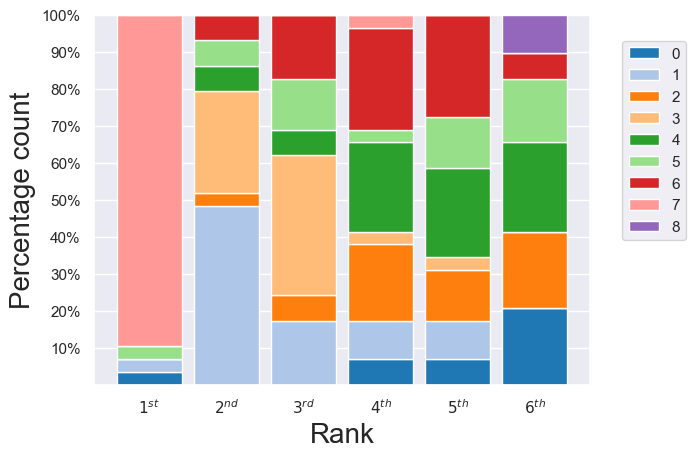

In [10]:
path=os.path.join(os.getcwd(),'images')
dim=X_tr.shape[1]
plt_importances_bars(imps,name,dim=dim,pwd=path)

#### Lympho

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3.378378,2.027027,6.081081,2.027027,4.054054,4.729730,4.054054,5.405405,4.729730,4.729730,2.027027,6.081081,9.459459,4.729730,4.729730,8.783784,12.162162,10.810811
1,6.756757,12.162162,2.027027,2.027027,6.756757,1.351351,2.702703,6.081081,0.675676,10.135135,4.054054,4.729730,12.837838,2.027027,7.432432,8.108108,4.729730,5.405405
2,6.756757,6.081081,0.675676,1.351351,0.675676,11.486486,0.000000,8.783784,2.027027,4.729730,12.162162,8.108108,6.756757,6.081081,6.756757,6.756757,5.405405,5.405405
3,7.432432,10.135135,2.702703,2.702703,2.702703,6.756757,0.675676,4.729730,1.351351,2.702703,8.108108,10.135135,7.432432,8.783784,9.459459,8.108108,2.027027,4.054054
4,10.810811,10.135135,2.027027,1.351351,3.378378,10.135135,0.000000,4.729730,0.675676,5.405405,6.081081,6.756757,4.729730,8.783784,8.783784,5.405405,5.405405,5.405405
5,9.459459,10.810811,0.675676,0.000000,6.081081,10.810811,2.027027,6.081081,2.702703,5.405405,6.081081,5.405405,6.081081,10.135135,5.405405,5.405405,4.054054,3.378378
6,5.405405,9.459459,2.702703,2.702703,0.675676,5.405405,4.729730,3.378378,6.756757,4.054054,4.729730,8.108108,4.054054,7.432432,4.729730,11.486486,6.756757,7.432432
7,8.108108,8.783784,5.405405,1.351351,3.378378,4.054054,2.027027,6.756757,5.405405,3.378378,5.405405,8.108108,9.459459,4.729730,6.756757,8.108108,4.729730,4.054054
8,8.108108,8.783784,8.783784,2.027027,6.081081,2.027027,3.378378,4.054054,4.054054,6.081081,7.432432,7.432432,5.405405,10.135135,4.054054,6.756757,2.702703,2.702703
9,6.081081,4.729730,6.756757,4.729730,5.405405,6.081081,1.351351,3.378378,3.378378,6.756757,8.783784,7.432432,5.405405,8.783784,4.729730,4.054054,4.729730,7.432432


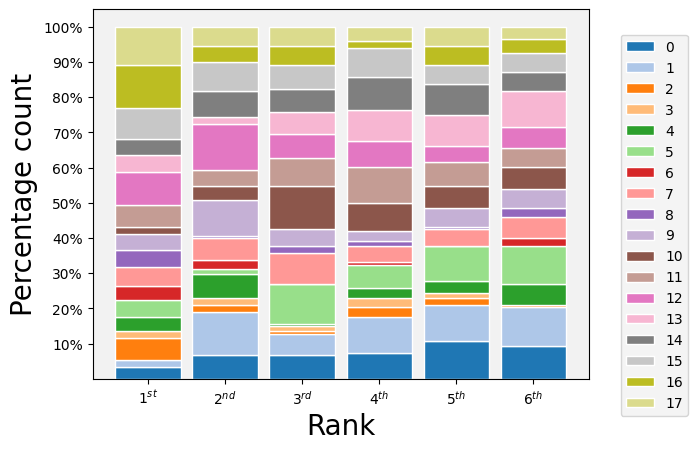

In [16]:
path=os.path.join(os.getcwd(),'images')
dim=X_tr.shape[1]
plt_importances_bars(imps,name,dim=dim,pwd=path)

#### Ionosphere

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,8.262108,1.424501,2.279202,2.564103,1.994302,5.698006,5.413105,9.116809,3.418803,2.279202,...,2.564103,3.133903,5.982906,0.569801,0.854701,1.424501,0.854701,2.279202,0.569801,2.564103
1,3.133903,1.709402,2.279202,2.849003,1.994302,6.267806,5.128205,5.698006,3.703704,3.133903,...,5.698006,2.279202,3.418803,1.139601,2.279202,2.849003,0.854701,4.843305,1.994302,1.994302
2,2.279202,3.133903,1.139601,0.854701,1.994302,3.418803,3.703704,4.843305,4.558405,3.988604,...,2.849003,3.418803,2.849003,0.854701,2.849003,1.994302,1.424501,2.564103,6.552707,4.558405
3,1.139601,3.418803,2.564103,1.424501,3.418803,2.849003,4.843305,8.262108,5.698006,3.418803,...,0.854701,3.133903,4.558405,2.279202,2.564103,1.709402,0.854701,5.128205,3.418803,2.849003
4,2.564103,2.849003,1.994302,2.279202,0.569801,3.418803,5.128205,3.418803,1.709402,3.133903,...,4.273504,3.133903,4.843305,2.279202,2.279202,2.564103,4.558405,3.988604,3.133903,5.982906
5,1.709402,3.988604,3.418803,2.564103,5.413105,1.709402,1.424501,3.703704,3.988604,1.139601,...,1.709402,3.988604,3.703704,3.703704,2.564103,8.831909,1.709402,4.558405,5.982906,1.994302
6,0.854701,2.564103,1.994302,1.709402,3.133903,2.564103,2.279202,2.564103,3.418803,4.843305,...,3.988604,3.418803,3.133903,2.279202,6.837607,1.994302,3.133903,4.273504,3.133903,2.279202
7,1.709402,2.564103,2.849003,1.424501,3.703704,3.418803,1.994302,2.849003,2.564103,0.854701,...,3.703704,5.128205,3.988604,6.552707,4.843305,2.279202,2.279202,4.273504,4.843305,3.418803
8,3.703704,3.703704,2.849003,2.564103,2.279202,3.133903,2.564103,2.849003,2.849003,3.133903,...,1.994302,6.552707,5.698006,2.279202,2.279202,1.139601,1.139601,3.133903,1.709402,2.564103
9,1.709402,5.128205,2.564103,1.139601,1.709402,2.564103,2.564103,4.273504,2.279202,5.413105,...,3.988604,6.837607,3.418803,4.273504,2.849003,2.279202,2.849003,4.558405,2.849003,3.703704


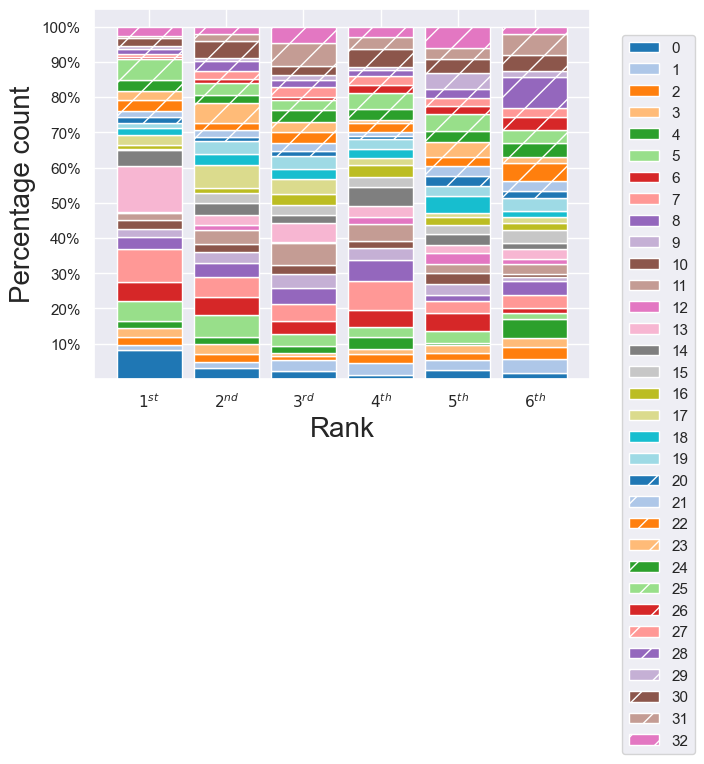

In [5]:
path=os.path.join(os.getcwd(),'images')
dim=X_tr.shape[1]
plt_importances_bars(imps,name,dim=dim,pwd=path)

#### Xaxis

,0,1,2,3,4,5
0,100.0,0.0,0.0,0.0,0.0,0.0
1,0.0,40.0,42.0,1.0,14.0,3.0
2,0.0,9.0,37.0,12.0,31.0,11.0
3,0.0,12.0,10.0,22.0,9.0,47.0
4,0.0,21.0,10.0,30.0,11.0,28.0
5,0.0,18.0,1.0,35.0,35.0,11.0


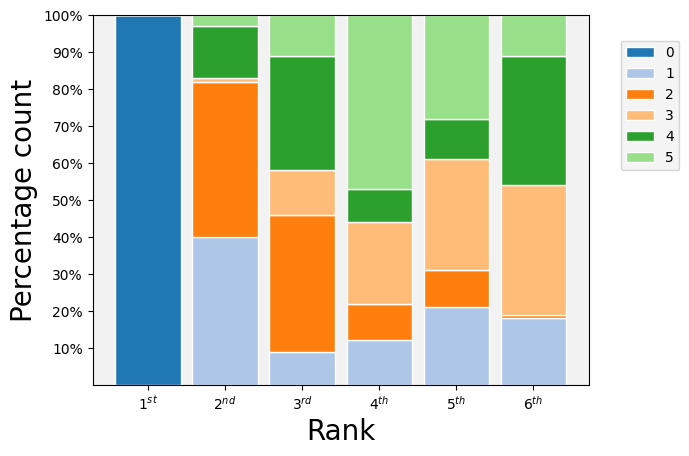

In [33]:
path=os.path.join(os.getcwd(),'images')
dim=X_tr.shape[1]
plt_importances_bars(imps,name,dim=dim,pwd=path)

### plt_feat_bar_plot

#### Glass

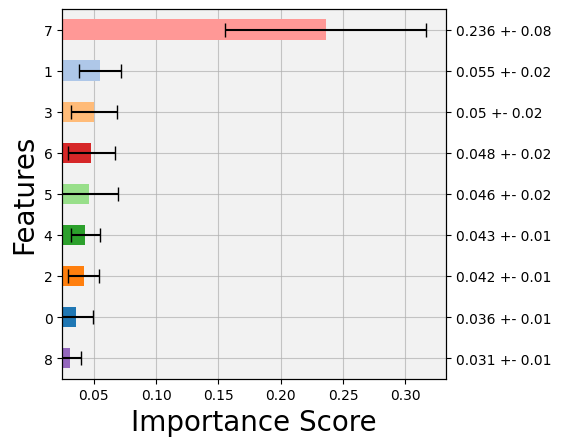

In [11]:
plt_feat_bar_plot(plt_data,name,pwd=path,save=True)

#### Lympho

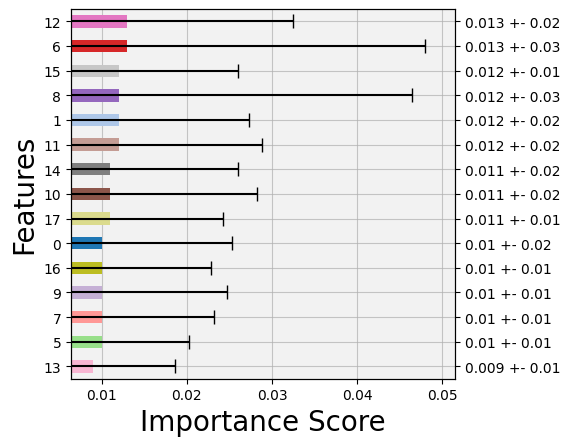

In [17]:
plt_feat_bar_plot(plt_data,name,pwd=path,save=True)

#### Ionosphere

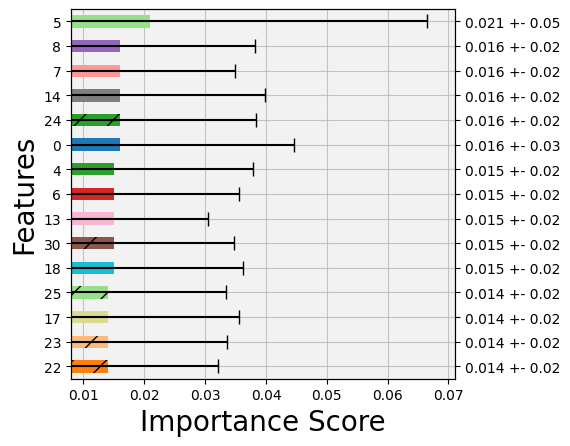

In [14]:
plt_feat_bar_plot(plt_data,name,pwd=path,save=True)

#### Xaxis

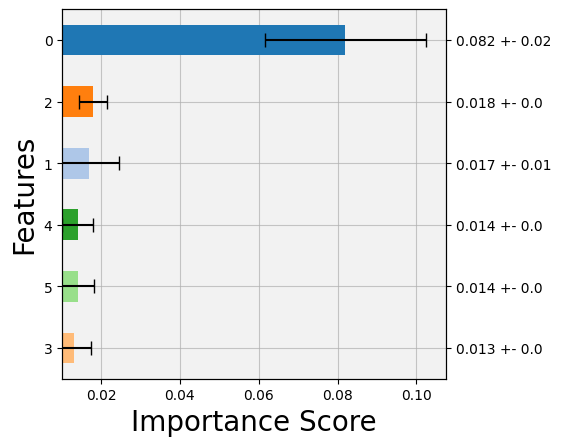

In [34]:
plt_feat_bar_plot(plt_data,name,pwd=path,save=True)

### plt_importance_map

#### Glass

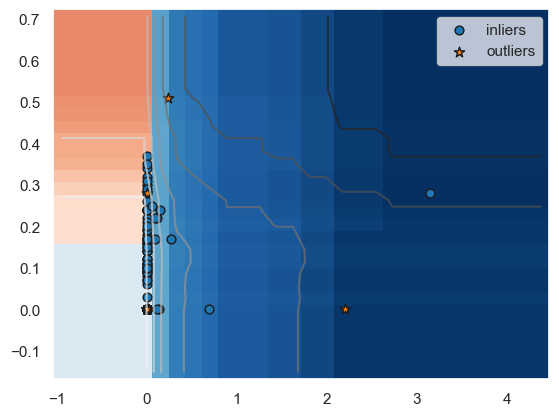

In [7]:
name='glass'
path=os.path.join(os.getcwd(),'images')
plot_importance_map(name,iforest_sklearn,X_tr,y_tr,30,pwd=path,save=True,feats_plot=(7,8))

#### Lympho

Handling the IndexError Exception...


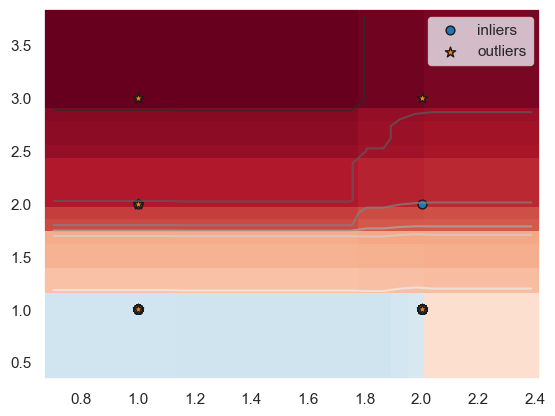

In [5]:
name='lympho'
path=os.path.join(os.getcwd(),'images')
plot_importance_map(name,iforest_sklearn,X_tr,y_tr,30,pwd=path,save=True,feats_plot=(7,8))

#### Ionosphere

Handling the IndexError Exception...


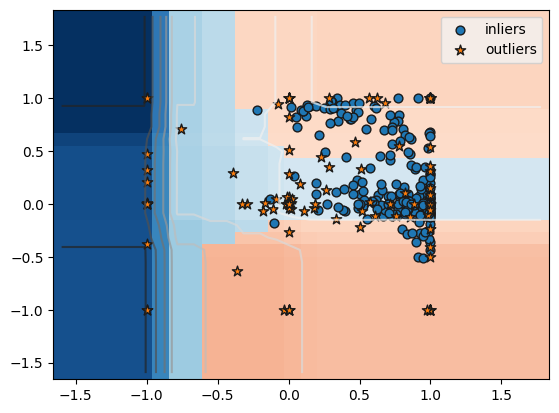

In [15]:
plot_importance_map(name,iforest_sklearn,X_tr,y_tr,30,pwd=path,save=True,feats_plot=(5,8))

#### Xaxis

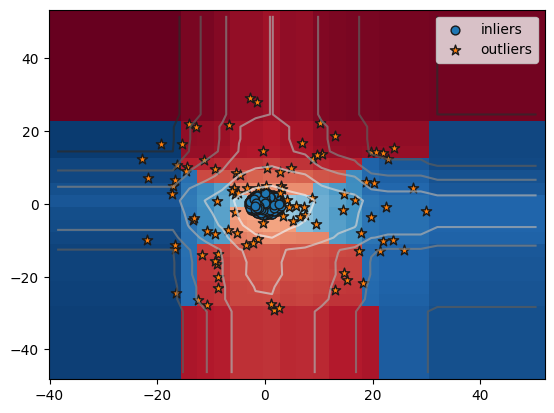

In [35]:
plot_importance_map(name,iforest_sklearn,X_tr,y_tr,30,pwd=path,save=True,feats_plot=(0,1))

### plt_complete_scoremap

This method takes a lot of time in particular with the datasets with a lot of features (like the ones contained in the folder data).

In [ ]:
plot_complete_scoremap(name,X_te.shape[1],iforest_sklearn,X_te,y_te)

## GFI

### compute_global_importances

#### Glass

In [6]:
name='glass'
pwd_imp_scores=os.path.join(os.getcwd(),'imp_scores')
pwd_plt_data=os.path.join(os.getcwd(),'plt_data')
iforest = IsolationForest(n_estimators= 100, max_samples=64, contamination=0.1, bootstrap=False)
global_imps,plt_data=compute_global_importances(iforest,X_tr,10,name,pwd_imp_scores,pwd_plt_data)

#### Lympho

In [ ]:
pwd_imp_scores=os.path.join(os.getcwd(),'imp_scores')
pwd_plt_data=os.path.join(os.getcwd(),'plt_data')
iforest = IsolationForest(n_estimators= 100, max_samples=64, contamination=0.1, bootstrap=False)
global_imps,plt_data=compute_global_importances(iforest,X_tr,10,name,pwd_imp_scores,pwd_plt_data)

### plt_importances_bars

#### Glass

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
1,20.0,10.0,0.0,0.0,50.0,0.0,20.0,0.0,0.0
2,10.0,60.0,0.0,10.0,0.0,10.0,10.0,0.0,0.0
3,30.0,20.0,0.0,10.0,10.0,10.0,20.0,0.0,0.0
4,20.0,0.0,0.0,30.0,10.0,20.0,20.0,0.0,0.0
5,0.0,0.0,0.0,10.0,20.0,40.0,20.0,0.0,10.0
6,20.0,10.0,0.0,40.0,0.0,20.0,10.0,0.0,0.0
7,0.0,0.0,50.0,0.0,10.0,0.0,0.0,0.0,40.0
8,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,50.0


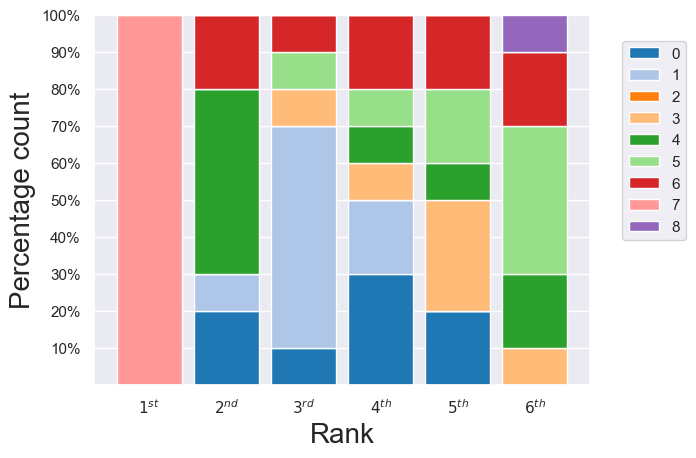

In [9]:
dim=X_tr.shape[1]
plt_importances_bars(global_imps,name,dim=dim,is_local=False)

#### Lympho

In [ ]:
dim=X_tr.shape[1]
plt_importances_bars(global_imps,name,dim=dim,is_local=False)

### plt_feat_bar_plot

#### Glass

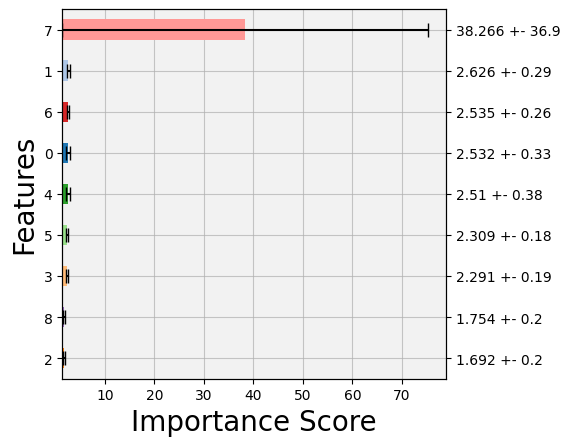

In [10]:
path=os.path.join(os.getcwd(),'images')
plt_feat_bar_plot(plt_data,name,pwd=path,is_local=False,save=True)

#### Lympho

In [ ]:
path=os.path.join(os.getcwd(),'images')
plt_feat_bar_plot(plt_data,name,pwd=path,is_local=False,save=True)

## Code to understand what to do in the pytest

## _get_iic

In [4]:
# start time
start = time.time()
# initialization
num_feat = X_tr.shape[1] 
estimators = iforest_sklearn.estimators_
cfi_outliers_ib = np.zeros(num_feat).astype('float')
cfi_inliers_ib = np.zeros(num_feat).astype('float')
counter_outliers_ib = np.zeros(num_feat).astype('int')
counter_inliers_ib = np.zeros(num_feat).astype('int')
in_bag_samples = iforest_sklearn.estimators_samples_

In [5]:
# for every iTree in the _sklearn
for k, estimator in enumerate(estimators):
    # get in-bag samples indices
    in_bag_sample = list(in_bag_samples[k])
    # get in-bag samples (predicted inliers and predicted outliers)
    X_ib = X_tr[in_bag_sample,:]
    as_ib = decision_function_single_tree(iforest_sklearn, k, X_ib)
    X_outliers_ib = X_ib[np.where(as_ib < 0)]
    X_inliers_ib = X_ib[np.where(as_ib > 0)]
    if X_inliers_ib.shape[0] == 0 or X_outliers_ib.shape[0] == 0:
        continue
    # compute relevant quantities
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right
    feature = estimator.tree_.feature
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    # compute node depths
    stack = [(0, -1)]  
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1
        # if we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

In [6]:
from interpretability_module import _get_iic
lambda_outliers_ib = _get_iic(estimator, X_outliers_ib, is_leaves, adjust_iic=True)

In [8]:
lambda_outliers_ib.shape[0]

29

In [31]:
lambda_outliers_ib.shape, X_outliers_ib.shape

((29,), (10, 9))

In [46]:
np.random.seed(0)
X = np.random.randn(100, 10)
# create an isolation forest model
iforest = IsolationForest(n_estimators=10, random_state=0)
iforest.fit(X)
is_leaves=np.random.choice([True, False], size=X.shape[0])
#adjust_iic=np.random.choice([True, False], size=1)
lambda_outliers_ib_false = _get_iic(iforest.estimators_[1], X, is_leaves, adjust_iic=False)
lambda_outliers_ib_true = _get_iic(iforest.estimators_[1], X, is_leaves, adjust_iic=True)
lambda_outliers_ib_false

array([-1.        , -1.        ,  0.66666667,  0.66666667, -1.        ,
       -1.        , -1.        , -1.        ,  0.83333333, -1.        ,
        0.8       , -1.        ,  0.5       ,  0.5       , -1.        ,
       -1.        ,  0.5       , -1.        , -1.        ,  0.85714286,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        ,  0.5       , -1.        , -1.        , -1.        ,
       -1.        ,  0.75      , -1.        ,  0.66666667, -1.        ,
       -1.        , -1.        , -1.        , -1.        ,  0.98734177,
       -1.        ,  0.94871795,  0.60810811, -1.        ,  0.2       ,
       -1.        ,  0.75555556, -1.        ,  0.09090909,  0.75      ,
        0.66666667,  0.5       , -1.        , -1.        , -1.        ])

In [47]:
lambda_outliers_ib_true

array([-1.        , -1.        ,  0.66666667,  0.66666667, -1.        ,
       -1.        , -1.        , -1.        ,  1.        , -1.        ,
        1.        , -1.        ,  0.5       ,  0.5       , -1.        ,
       -1.        ,  0.5       , -1.        , -1.        ,  1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        ,  0.5       , -1.        , -1.        , -1.        ,
       -1.        ,  1.        , -1.        ,  0.66666667, -1.        ,
       -1.        , -1.        , -1.        , -1.        ,  1.        ,
       -1.        ,  0.96052632,  0.61111111, -1.        , -0.5       ,
       -1.        ,  0.76190476, -1.        , -0.125     ,  1.        ,
        0.66666667,  0.5       , -1.        , -1.        , -1.        ])

In [51]:
lambda_outliers_ib_false >= 0.7

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False])

## local_diffi

In [19]:
# create a random dataset
np.random.seed(0)
# local_diffi works on a single sample
X = np.random.randn(100,10)
# create an isolation forest model
iforest = IsolationForest(n_estimators=10, max_samples=64 ,random_state=0)
iforest.fit(X)
#Select a single sample from X at random
x=X[np.random.randint(0,X.shape[0]),:]

In [22]:
fi,time=local_diffi(iforest,x)

In [23]:
time

0.008695840835571289

In [20]:
# start time
start = time.time()
# initialization 
estimators = iforest.estimators_
cfi = np.zeros(len(x)).astype('float')
counter = np.zeros(len(x)).astype('int')
max_depth = int(np.ceil(np.log2(iforest.max_samples)))

## local_diffi_batch

In [24]:
# create a random dataset
np.random.seed(0)
# local_diffi works on a single sample
X = np.random.randn(100,10)
# create an isolation forest model
iforest = IsolationForest(n_estimators=10, max_samples=64 ,random_state=0)
iforest.fit(X)

IsolationForest(max_samples=64, n_estimators=10, random_state=0)

In [25]:
fi_ib,ord_idx,exec_time=local_diffi_batch(iforest, X)
fi_ib.shape,X.shape

((100, 10), (100, 10))

In [26]:
exec_time

[0.008002281188964844,
 0.005988597869873047,
 0.008008956909179688,
 0.006990194320678711,
 0.0019989013671875,
 0.005002021789550781,
 0.009003162384033203,
 0.003994941711425781,
 0.0020029544830322266,
 0.008997201919555664,
 0.005005359649658203,
 0.004996538162231445,
 0.008005142211914062,
 0.002997875213623047,
 0.0059947967529296875,
 0.00901341438293457,
 0.005988597869873047,
 0.008002042770385742,
 0.005002498626708984,
 0.04299569129943848,
 0.004998922348022461,
 0.004000425338745117,
 0.0070002079010009766,
 0.0049991607666015625,
 0.005999088287353516,
 0.006005048751831055,
 0.0050067901611328125,
 0.007990598678588867,
 0.012999773025512695,
 0.0070002079010009766,
 0.0030012130737304688,
 0.006998777389526367,
 0.0060007572174072266,
 0.0070002079010009766,
 0.005004167556762695,
 0.008997440338134766,
 0.0050008296966552734,
 0.008994102478027344,
 0.005001544952392578,
 0.005999565124511719,
 0.005003213882446289,
 0.0029997825622558594,
 0.0049991607666015625,
 0.

## compute_local_importances

In [3]:
# create a random dataset
np.random.seed(0)
# local_diffi works on a single sample
X = np.random.randn(100,10)
# create an isolation forest model
iforest = IsolationForest(n_estimators=10, max_samples=64 ,random_state=0)
iforest.fit(X)
imp_score_path=os.path.join(os.getcwd(),'imp_scores')
plt_data_path=os.path.join(os.getcwd(),'plt_data')
name='test'
imps,plt_data,path_fi,path_plt_data=compute_local_importances(iforest,X,name,imp_score_path,plt_data_path)

In [6]:
pickle.load(open(path_plt_data,'rb'))

{'Importances': array([0.00302778, 0.00578659, 0.0061828 , 0.00781217, 0.00918624,
        0.00938135, 0.00954048, 0.00968045, 0.01192269, 0.01221124]),
 'feat_order': array([3, 0, 7, 1, 6, 9, 8, 2, 4, 5], dtype=int64),
 'std': array([0.0123734 , 0.01245985, 0.01632168, 0.03286729, 0.0154525 ,
        0.01837945, 0.02232898, 0.02532521, 0.01537595, 0.03801821])}

In [9]:
plt_data_keys=list(plt_data.keys())
imp,feat_ord,std=plt_data[plt_data_keys[0]],plt_data[plt_data_keys[1]],plt_data[plt_data_keys[2]]

In [9]:
imp_score_path=os.path.join(os.getcwd(),'imp_scores')
plt_data_path=os.path.join(os.getcwd(),'plt_data')
name='test_global'

In [10]:
nruns=np.random.randint(1,10)
fi,plt_data,path_fi,path_plt_data=compute_global_importances(iforest,X,nruns,name,pwd_imp_score=imp_score_path,pwd_plt_data=plt_data_path)

In [12]:
plt_data_keys=list(plt_data.keys())
imp,feat_ord,std=plt_data[plt_data_keys[0]],plt_data[plt_data_keys[1]],plt_data[plt_data_keys[2]]

In [15]:
std.shape,X.shape

((10,), (100, 10))

## plt_importances_bars

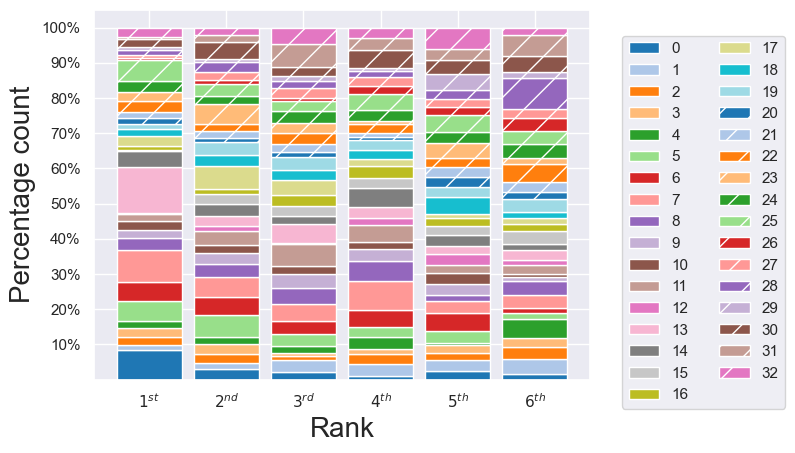

In [3]:
import os
pwd=os.path.join(os.getcwd(),'images')
imps_path=os.path.join(os.getcwd(),'imp_scores','imp_score_LFI_ionosphere.pkl')
fig,ax,bars=plt_importances_bars(imps_path,name='bar_plot_test',pwd=pwd)
#fig,ax,bars=plt_importances_bars(imps_path,name='bar_plot_test',pwd=pwd)
#plt.show()

In [4]:
with open(imps_path, 'rb') as f:
        importances = pickle.load(f)
type(importances)

numpy.ndarray

In [5]:
importances.shape[1]

9

In [13]:
ax.get_xlabel()

'Rank'

In [14]:
ax.get_ylabel()

'Percentage count'

In [11]:
x_tick_labels = [tick.get_text() for tick in ax.get_xticklabels()]
y_tick_labels = [tick.get_text() for tick in ax.get_yticklabels()]

In [17]:
x_tick_labels

['$1^{st}$', '$2^{nd}$', '$3^{rd}$', '$4^{th}$', '$5^{th}$', '$6^{th}$']

In [19]:
y_tick_labels

['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']

In [21]:
legend = ax.legend()
title = legend.get_title().get_text()

''

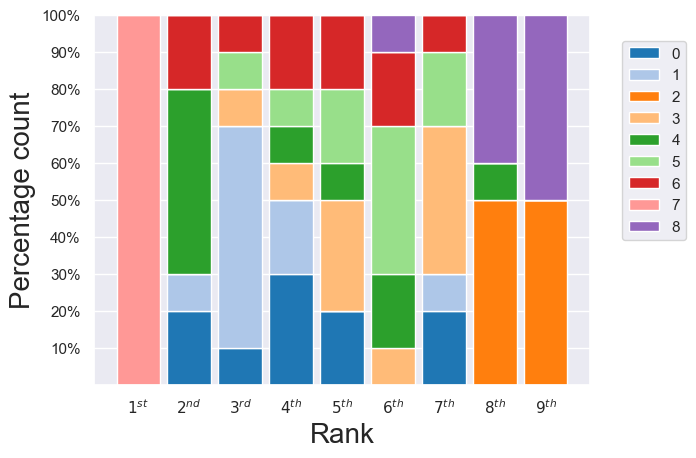

In [16]:
fig1,ax1,bars1=plt_importances_bars(imps,name='bar_plot_test',dim=imps.shape[1],pwd=pwd,f=9)
plt.show()

In [22]:
x_tick_labels1 = [tick.get_text() for tick in ax1.get_xticklabels()]
y_tick_labels1 = [tick.get_text() for tick in ax1.get_yticklabels()]

In [24]:
y_tick_labels1

['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']

In [30]:
bars.shape

(9, 9)

In [4]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from PIL import Image
import numpy as np

# Save figure1 as an image
canvas = FigureCanvas(fig)
canvas.draw()
image1 = Image.frombytes('RGB', canvas.get_width_height(), canvas.tostring_rgb())

In [4]:
! pip install pdf2image


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\lemeda98\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
from pdf2image import convert_from_path
from PIL import Image

# Specify the path to the PDF file
pdf_file = os.path.join(os.getcwd(),'images','GFI_glass_synt.pdf')

# Convert the PDF to a list of PIL Image objects
images = convert_from_path(pdf_file)

# Save each image as a PNG file
for i, img in enumerate(images):
    img.save(f'GFI_glass_synt{i}.png', 'PNG')

In [14]:
type(images[0])

PIL.PpmImagePlugin.PpmImageFile

In [21]:
! pip install opencv-python


   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.1 MB 4.3 MB/s eta 0:00:09
   ---------------------------------------- 0.4/38.1 MB 5.0 MB/s eta 0:00:08
    --------------------------------------- 0.7/38.1 MB 5.4 MB/s eta 0:00:07
    --------------------------------------- 0.9/38.1 MB 5.8 MB/s eta 0:00:07
   - -------------------------------------- 1.3/38.1 MB 5.0 MB/s eta 0:00:08
   - -------------------------------------- 1.5/38.1 MB 5.4 MB/s eta 0:00:07
   - -------------------------------------- 1.7/38.1 MB 5.5 MB/s eta 0:00:07
   -- ------------------------------------- 2.0/38.1 MB 5.5 MB/s eta 0:00:07
   -- ------------------------------------- 2.2/38.1 MB 5.3 MB/s eta 0:00:07
   -- ------------------------------------- 2.4/38.1 MB 5.2 MB/s eta 0:00:07
   -- ------------------------------------- 2.6/38.1 MB 5.2 MB/s eta 0:00:07
   -- ------------------------------------- 2.7/38.1 MB 5.1 MB/s eta 0:00:07
   ---

In [24]:
import cv2
import numpy as np

# Load the images
image1 = cv2.imread(os.path.join(os.getcwd(),'images','GFI_glass_synt_test.png'))
image2 = cv2.imread(os.path.join(os.getcwd(),'images','GFI_glass_synt_expected.png'))

# Resize the larger image to match the shape of the smaller image
if image1.shape[0] * image1.shape[1] < image2.shape[0] * image2.shape[1]:
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))
else:
    image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))

# Convert images to NumPy arrays for comparison
array1 = np.array(image1)
array2 = np.array(image2)

# Compare the images for visual similarity (e.g., using mean squared error)
mse = np.mean((array1 - array2) ** 2)

# Define a threshold for similarity
threshold = 0.1  # Adjust as needed

if mse < threshold:
    print("Figures are visually similar.")
else:
    print("Figures are not visually similar.")


Figures are not visually similar.


## plt_feat_bar_plot

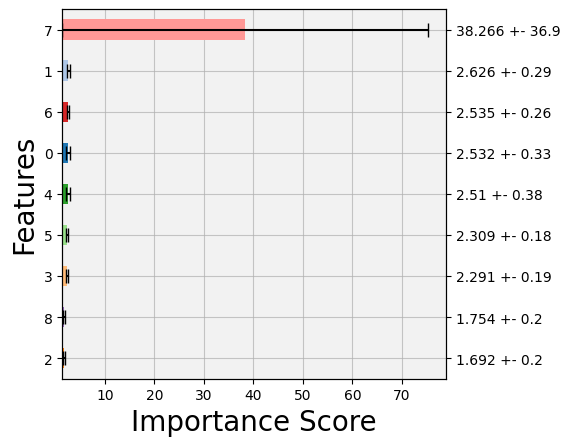

In [3]:
plt_data_global_path=os.path.join(os.getcwd(),'plt_data','plt_data_GFI_glass.pkl')
plt_data_local_path=os.path.join(os.getcwd(),'plt_data','plt_data_LFI_glass.pkl')

name_global='test_GFI_Glass'
name_local='test_LFI_Glass'

plot_path=os.path.join(os.getcwd(),'images')

ax1,ax2=plt_feat_bar_plot(plt_data_global_path,name_global,pwd=plot_path,is_local=False)
plt.show()

In [12]:
x_tick_labels = [tick.get_text() for tick in ax1.get_xticklabels()]
y_tick_labels = [tick.get_text() for tick in ax1.get_yticklabels()]
y_tick_labels

['2', '8', '3', '5', '4', '0', '6', '1', '7']

In [14]:
y_tick_labels2 = [tick.get_text() for tick in ax2.get_yticklabels()]
len(y_tick_labels2)

9

In [24]:
yticks=np.array(y_tick_labels).astype('float')
yticks>5

array([False,  True, False, False, False, False,  True, False,  True])

In [26]:
np.all(np.array(y_tick_labels).astype('float')>=np.array(y_tick_labels).astype('float'))

False

## plot_importance_map

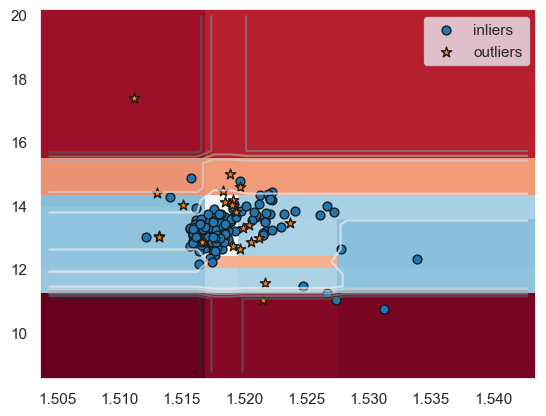

In [3]:
name='Glass'
# create an isolation forest model
iforest = IsolationForest(n_estimators=10, max_samples=64, random_state=0)
iforest.fit(X_tr)
plot_path=os.path.join(os.getcwd(),'tests','test_plots')

_,_=plot_importance_map(name,iforest,X_tr,y_tr,30,pwd=plot_path)


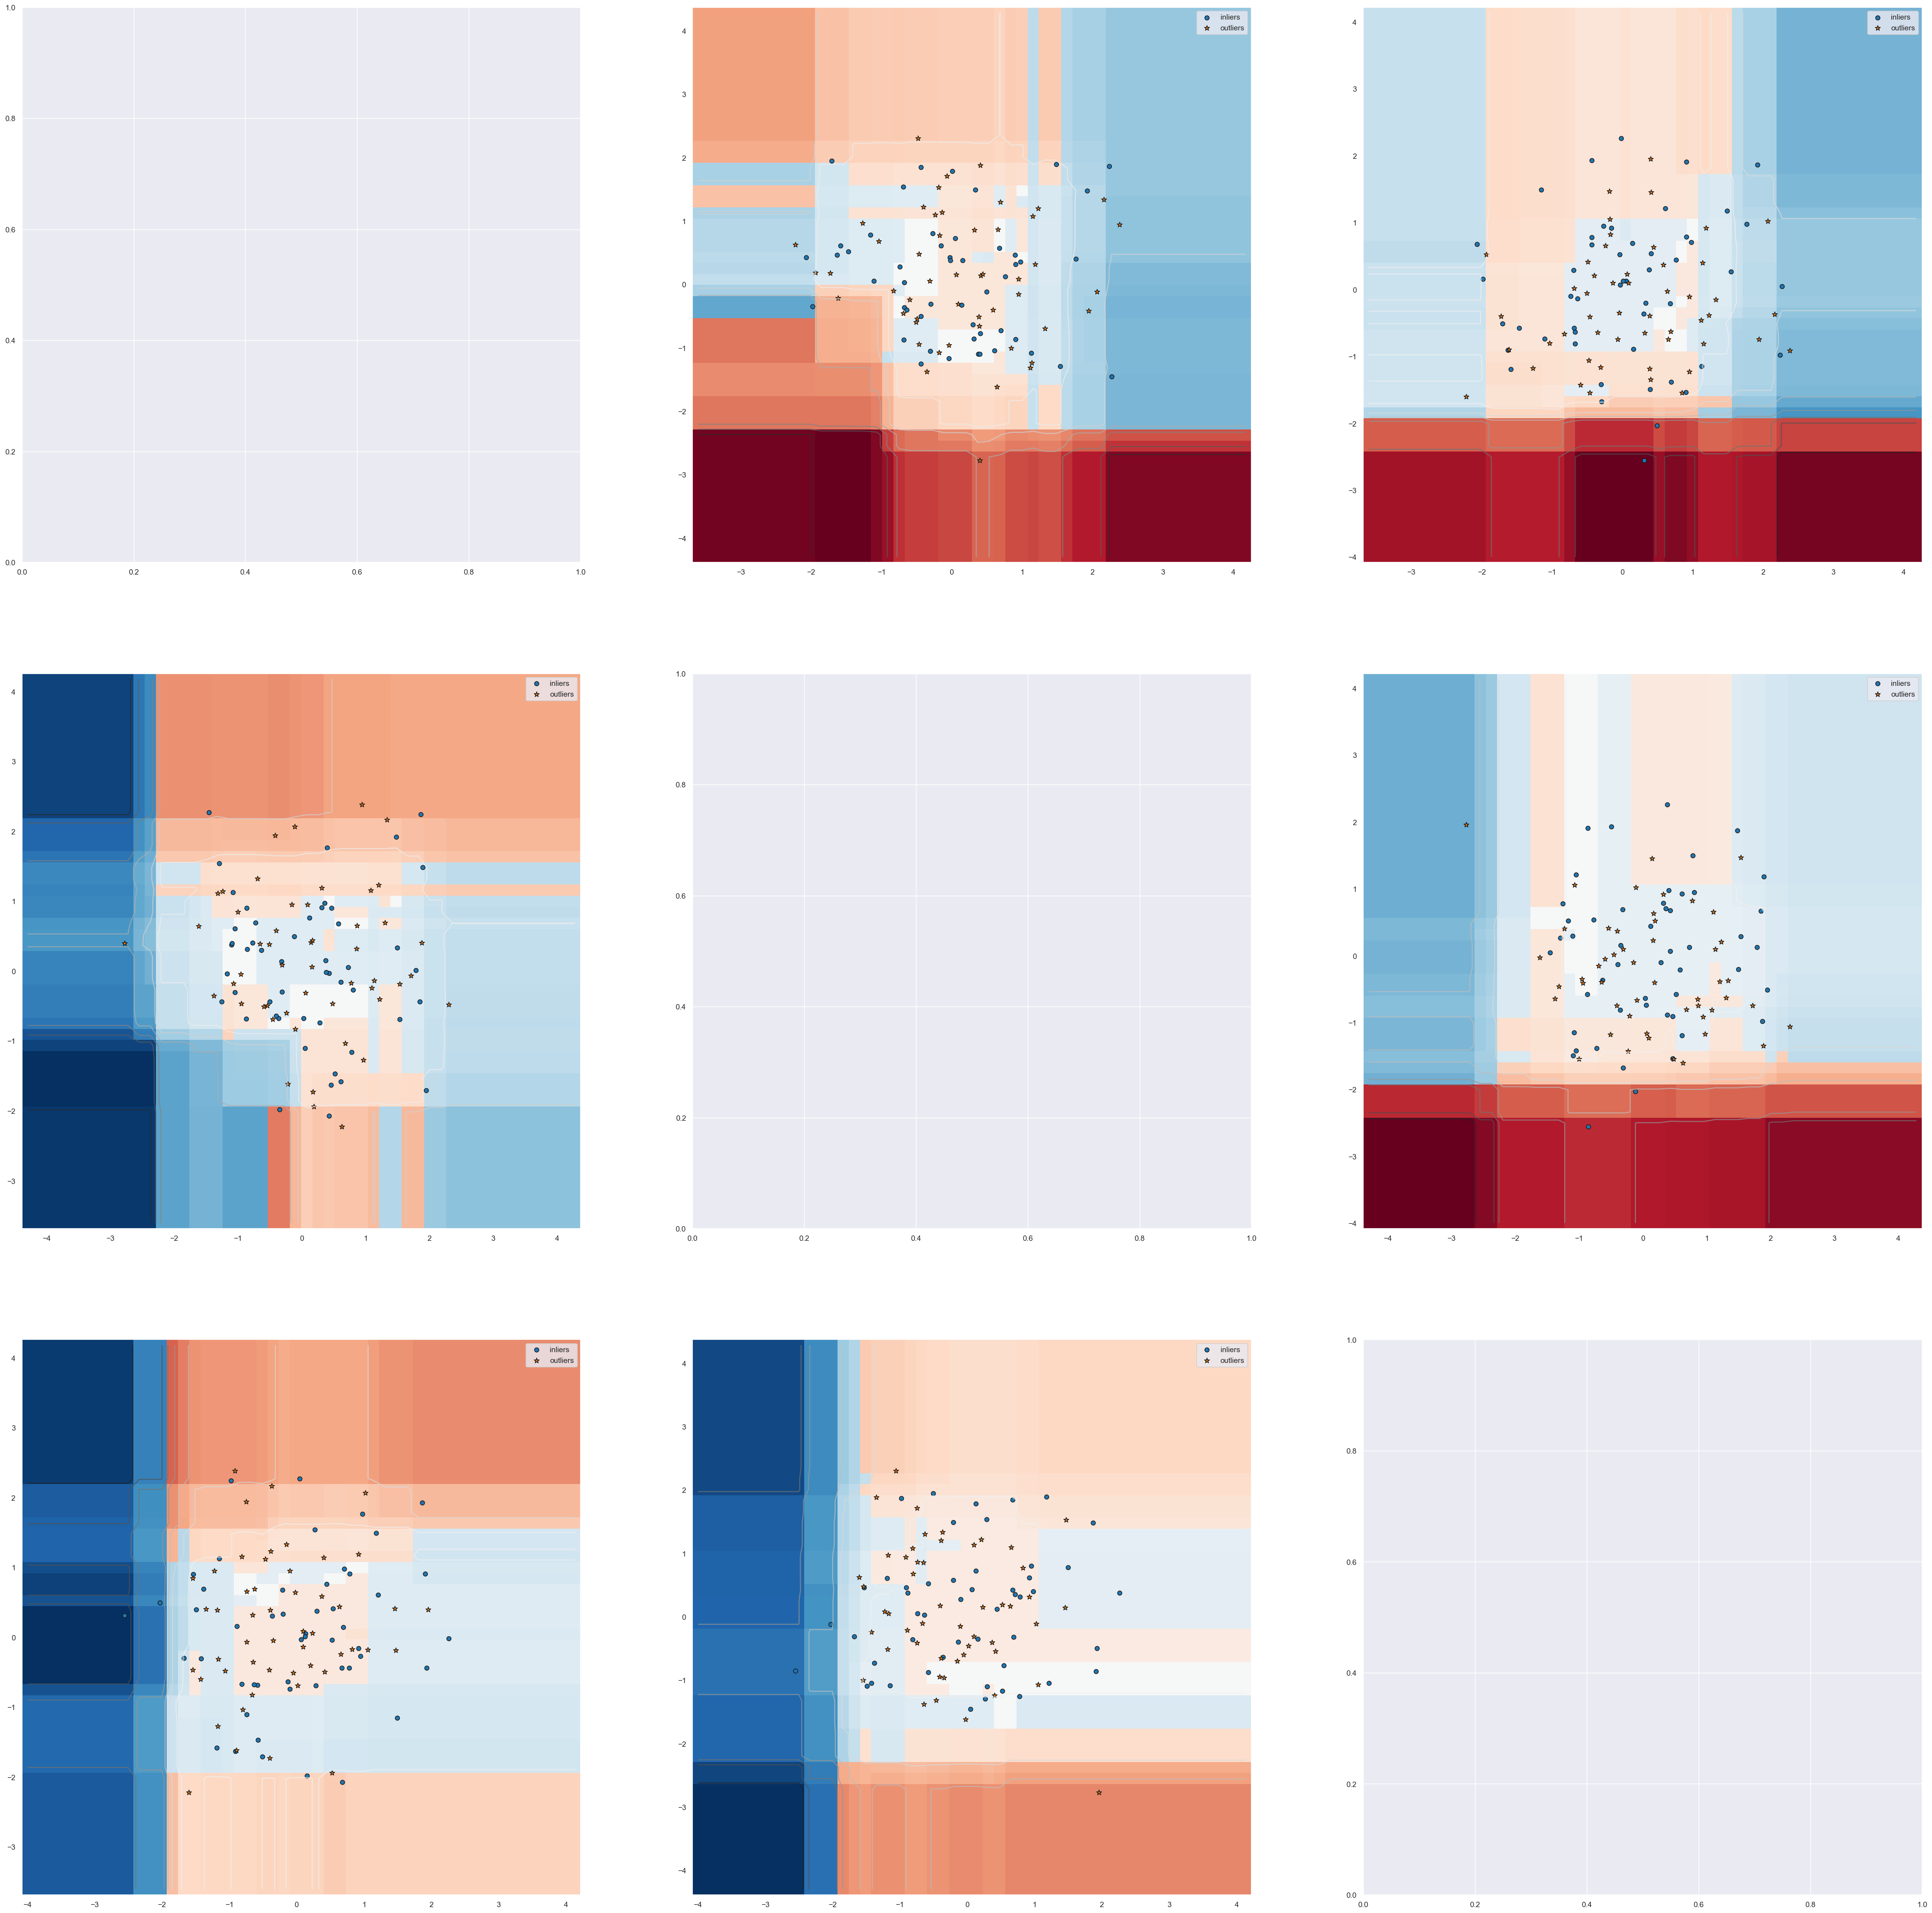

In [4]:
np.random.seed(0)
X = np.random.randn(100, 3)
#Assign at random the anomalous/not anomaoous labels
#Create a random array of 0 and 1 of shape=(100,)
y=np.random.randint(0,2,size=100)
name='test_complete'
# create an isolation forest model
iforest = IsolationForest(n_estimators=10, max_samples=64, random_state=0)
iforest.fit(X)
plot_path=os.path.join(os.getcwd(),'tests','test_plots')

fig,ax=plot_complete_scoremap(name,X.shape[1],iforest,X,y,pwd=plot_path)